<a href="https://colab.research.google.com/github/Senihayild/PRA3024/blob/main/GW_Assign1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment_Set 1 :**
Identify a loud binary black hole signal in white, Gaussian noise.
Data file is "challenge1.gwf" , the channel name is "H1:CHALLENGE1".

- First, install the software and load the data in memeory.


In [ ]:
! pip install pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

In [ ]:
! pip install -q 'gwpy==3.0.8'
from gwpy.timeseries import TimeSeries
data = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

- Sampling rate(Hz) and duration of data(s)


In [ ]:
sampling_rate = data.sample_rate.value
duration = data.duration.value

print("Sampling Rate:", sampling_rate, "Hz")
print("Duration:", duration, "seconds")

Sampling Rate: 4096.0 Hz
Duration: 128.0 seconds


- Plot the data in the time domain





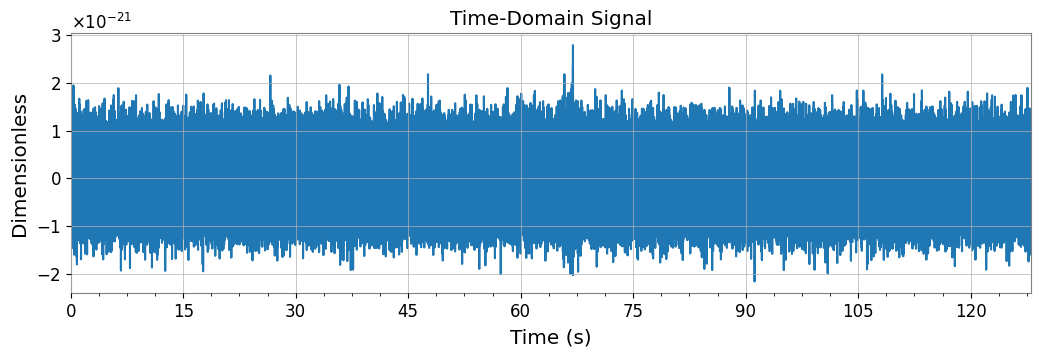

In [ ]:
%matplotlib inline
plot = data.plot(title="Time-Domain Signal", xlabel="Time (s)", ylabel="Dimensionless")


- Plot a spectogram of the data

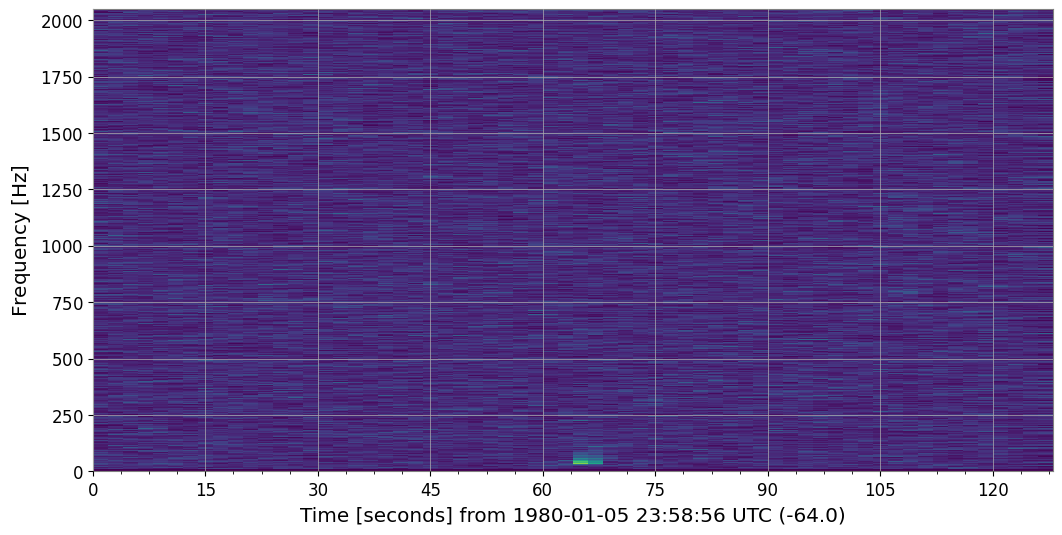

In [ ]:
specgram = data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

- This spectrogram is may not be sufficient to identify signal. I can only spot the hot point in this colormap. This hot point seems between 63.75 seconds to ±68 seconds. But not clear obviously. With adding max and min values, control the display we can make it more clear to indetifying signal.

In [ ]:
specgram.min()

<Quantity 2.01459722e-29 ct / Hz(1/2)>

In [ ]:
specgram.max()

<Quantity 7.67895517e-23 ct / Hz(1/2)>

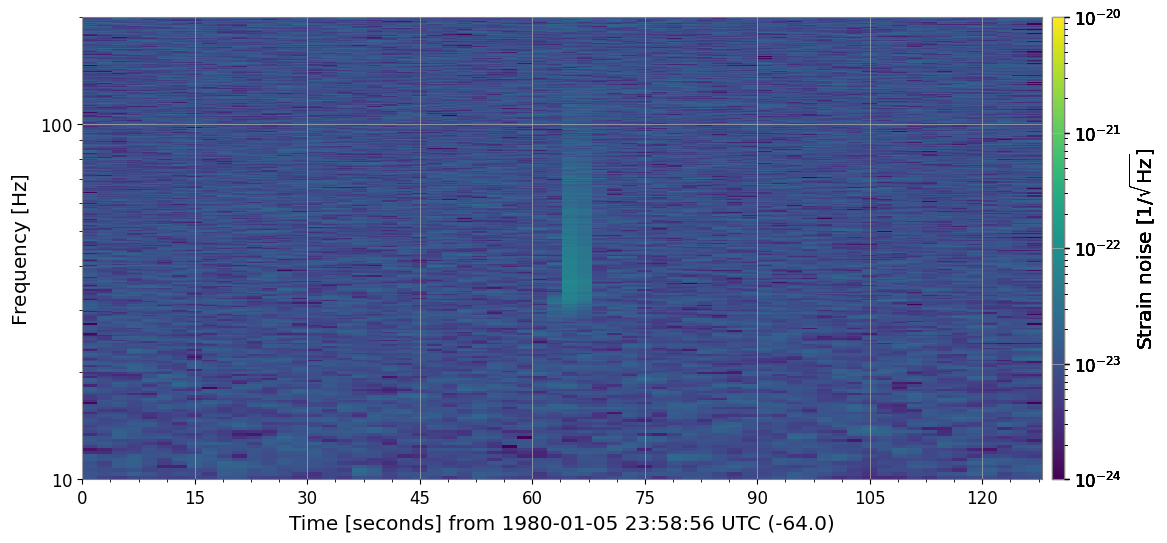

In [ ]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 200)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

- It's still to hard identify the signal. I'll try Q-tansform of the data and see if it's more useful for this case.

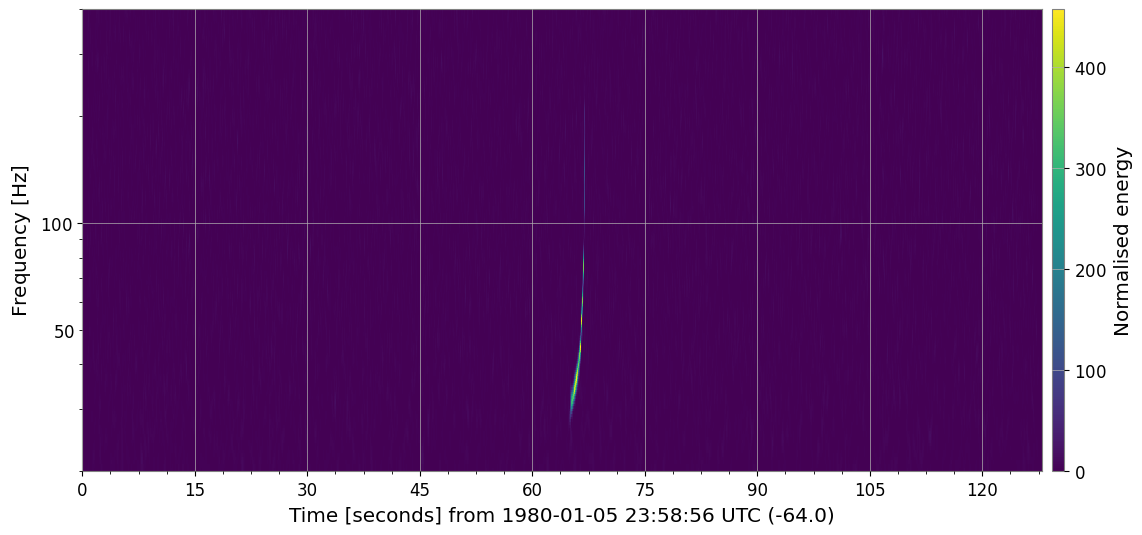

In [ ]:
#for the better resolution
hq = data.q_transform(frange=(20, 400), qrange=(25, 25))
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

- Time of the BBH signal merger is clearly visible after a few adjustment. Time of the merger is seems 67.5-64.0 s, so 3.75s. To be sure I'll use outseg command

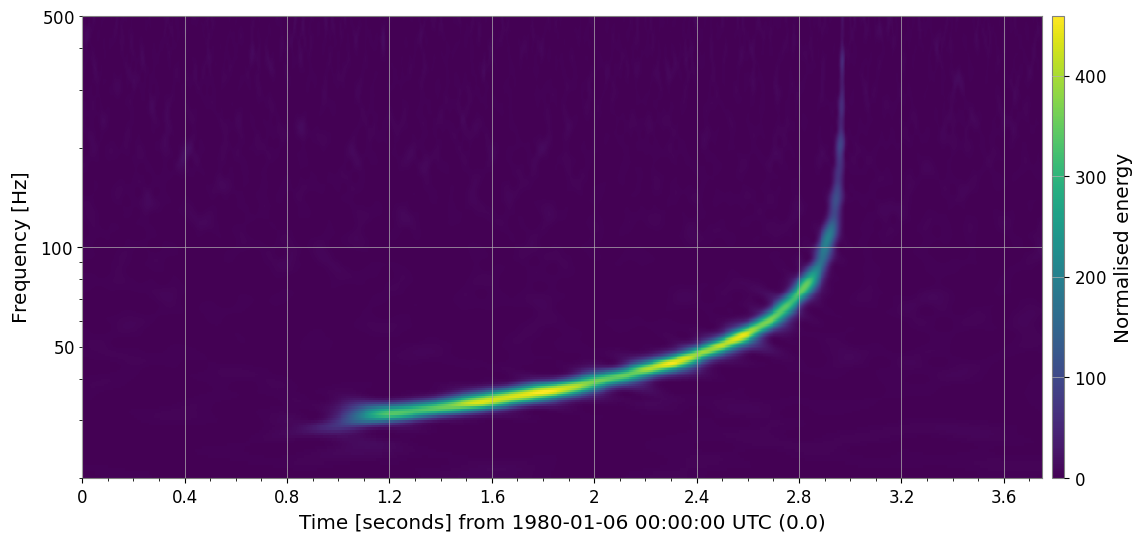

In [ ]:
q1 = data.q_transform(frange=(20, 500), qrange=(25, 25),outseg=(0,3.75))
plot = q1.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

- Time of the BBH signal merger is more clear after outseg. Without the doubt time of the merger is 3.0 seconds.